In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from  sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import openpyxl
from collections import Counter


In [78]:
# CSV dosyasını yükleme
file_path = "output.csv"
data = pd.read_csv(file_path, encoding="utf-8")

In [79]:
data

,Date(TS),Latitude,Longitude,Depth,Type,Magnitude,Location,EventID
0,19-12-2023 15:53:54,36.7533,31.9392,11.18,ML,1.7,Alanya (Antalya),613340
1,19-12-2023 15:40:41,40.0211,35.0383,7.00,ML,1.5,Alaca (Çorum),613341
2,19-12-2023 15:24:32,39.9367,39.3114,14.52,ML,2.2,Kelkit (Gümüşhane),613339
3,19-12-2023 15:11:38,38.2667,39.1936,7.22,ML,1.9,Çüngüş (Diyarbakır),613338
4,19-12-2023 14:52:11,38.1194,38.4828,7.00,ML,1.0,Sincik (Adıyaman),613337
...,...,...,...,...,...,...,...,...
3335,19-12-2023 00:31:44,37.3239,37.0428,8.14,ML,1.7,Pazarcık (Kahramanmaraş),613286
3336,19-12-2023 00:28:45,37.3258,37.0450,5.00,ML,2.1,Pazarcık (Kahramanmaraş),613285
3337,19-12-2023 00:27:49,39.9269,39.3019,12.39,ML,2.7,Kelkit (Gümüşhane),613282
3338,19-12-2023 00:24:10,39.9258,39.3258,7.05,ML,1.6,Kelkit (Gümüşhane),613284


In [80]:
"""
DataFrame'deki her sutunun toplam NaN değerlerin sayısına bakıldı.
Ancak herhangi bir NaN ifadesi olmadığı için DataFrame'de işlem yapılmadı.
"""
NaN_values= data.isna().sum()
#print(NaN_values)

data = data.drop("EventID", axis=1)

In [81]:
data

,Date(TS),Latitude,Longitude,Depth,Type,Magnitude,Location
0,19-12-2023 15:53:54,36.7533,31.9392,11.18,ML,1.7,Alanya (Antalya)
1,19-12-2023 15:40:41,40.0211,35.0383,7.00,ML,1.5,Alaca (Çorum)
2,19-12-2023 15:24:32,39.9367,39.3114,14.52,ML,2.2,Kelkit (Gümüşhane)
3,19-12-2023 15:11:38,38.2667,39.1936,7.22,ML,1.9,Çüngüş (Diyarbakır)
4,19-12-2023 14:52:11,38.1194,38.4828,7.00,ML,1.0,Sincik (Adıyaman)
...,...,...,...,...,...,...,...
3335,19-12-2023 00:31:44,37.3239,37.0428,8.14,ML,1.7,Pazarcık (Kahramanmaraş)
3336,19-12-2023 00:28:45,37.3258,37.0450,5.00,ML,2.1,Pazarcık (Kahramanmaraş)
3337,19-12-2023 00:27:49,39.9269,39.3019,12.39,ML,2.7,Kelkit (Gümüşhane)
3338,19-12-2023 00:24:10,39.9258,39.3258,7.05,ML,1.6,Kelkit (Gümüşhane)


# One-Hot Encode

In [82]:
one_hot_encoded = pd.get_dummies(data['Type'], prefix='Type')

data = pd.concat([data, one_hot_encoded], axis=1)

# One-Hot Encoding yapıldığı için Type sütunu silinir
data = data.drop('Type', axis=1)


In [83]:
data

,Date(TS),Latitude,Longitude,Depth,Magnitude,Location,Type_ML
0,19-12-2023 15:53:54,36.7533,31.9392,11.18,1.7,Alanya (Antalya),True
1,19-12-2023 15:40:41,40.0211,35.0383,7.00,1.5,Alaca (Çorum),True
2,19-12-2023 15:24:32,39.9367,39.3114,14.52,2.2,Kelkit (Gümüşhane),True
3,19-12-2023 15:11:38,38.2667,39.1936,7.22,1.9,Çüngüş (Diyarbakır),True
4,19-12-2023 14:52:11,38.1194,38.4828,7.00,1.0,Sincik (Adıyaman),True
...,...,...,...,...,...,...,...
3335,19-12-2023 00:31:44,37.3239,37.0428,8.14,1.7,Pazarcık (Kahramanmaraş),True
3336,19-12-2023 00:28:45,37.3258,37.0450,5.00,2.1,Pazarcık (Kahramanmaraş),True
3337,19-12-2023 00:27:49,39.9269,39.3019,12.39,2.7,Kelkit (Gümüşhane),True
3338,19-12-2023 00:24:10,39.9258,39.3258,7.05,1.6,Kelkit (Gümüşhane),True


# Feature Engineering

In [84]:
"""
Feature Engineering yaparak veri setinin özelliklerinden yeni özellikler oluşturulur.
Böylece model veriyi daha iyi anlar ve tahmin yeteneği artar.
"""

# 'Date(TS)' sütununu tarih ve saat olarak ayır
data[['Date', 'Time']] = data['Date(TS)'].str.split(expand=True)

# 'Date' sütununu "-" karakteriyle bölerek ayları al
data[['Day', 'Month', 'Year']] = data['Date'].str.split('-', expand=True)

data['Month'] = data['Month'].astype(int)
data['Year'] = data['Year'].astype(int)
data['Hour'] = data['Time'].apply(lambda x: int(x[0:2]))
data = data.drop('Time', axis=1)
data = data.drop('Date(TS)', axis=1)

In [85]:
data

,Latitude,Longitude,Depth,Magnitude,Location,Type_ML,Date,Day,Month,Year,Hour
0,36.7533,31.9392,11.18,1.7,Alanya (Antalya),True,19-12-2023,19,12,2023,15
1,40.0211,35.0383,7.00,1.5,Alaca (Çorum),True,19-12-2023,19,12,2023,15
2,39.9367,39.3114,14.52,2.2,Kelkit (Gümüşhane),True,19-12-2023,19,12,2023,15
3,38.2667,39.1936,7.22,1.9,Çüngüş (Diyarbakır),True,19-12-2023,19,12,2023,15
4,38.1194,38.4828,7.00,1.0,Sincik (Adıyaman),True,19-12-2023,19,12,2023,14
...,...,...,...,...,...,...,...,...,...,...,...
3335,37.3239,37.0428,8.14,1.7,Pazarcık (Kahramanmaraş),True,19-12-2023,19,12,2023,0
3336,37.3258,37.0450,5.00,2.1,Pazarcık (Kahramanmaraş),True,19-12-2023,19,12,2023,0
3337,39.9269,39.3019,12.39,2.7,Kelkit (Gümüşhane),True,19-12-2023,19,12,2023,0
3338,39.9258,39.3258,7.05,1.6,Kelkit (Gümüşhane),True,19-12-2023,19,12,2023,0


In [86]:
data = data.drop('Date', axis=1)

In [87]:
data

,Latitude,Longitude,Depth,Magnitude,Location,Type_ML,Day,Month,Year,Hour
0,36.7533,31.9392,11.18,1.7,Alanya (Antalya),True,19,12,2023,15
1,40.0211,35.0383,7.00,1.5,Alaca (Çorum),True,19,12,2023,15
2,39.9367,39.3114,14.52,2.2,Kelkit (Gümüşhane),True,19,12,2023,15
3,38.2667,39.1936,7.22,1.9,Çüngüş (Diyarbakır),True,19,12,2023,15
4,38.1194,38.4828,7.00,1.0,Sincik (Adıyaman),True,19,12,2023,14
...,...,...,...,...,...,...,...,...,...,...
3335,37.3239,37.0428,8.14,1.7,Pazarcık (Kahramanmaraş),True,19,12,2023,0
3336,37.3258,37.0450,5.00,2.1,Pazarcık (Kahramanmaraş),True,19,12,2023,0
3337,39.9269,39.3019,12.39,2.7,Kelkit (Gümüşhane),True,19,12,2023,0
3338,39.9258,39.3258,7.05,1.6,Kelkit (Gümüşhane),True,19,12,2023,0


Pearson Korelasyonu:
Pearson korelasyonu iki değişken arasındaki lineer ilişkiyi ölçen bir istatistiksel ölçüdür.
İki değişken arasındaki ilişkinin ne kadar güçlü ve hangi yönde olduğunu belirlemek için kullanılır.
Pearson korelasyon katsayısı, -1 ile 1 arasında bir değer alır:
1'e yaklaşan bir değer, iki değişken arasında pozitif bir lineer ilişki olduğunu gösterir. 
Yani, bir değişken artarken diğer değişken de artar.
-1'e yaklaşan bir değer, iki değişken arasında negatif bir lineer ilişki olduğunu gösterir. 
Yani, bir değişken artarken diğer değişken azalır.
0'a yaklaşan bir değer, iki değişken arasında bir lineer ilişki olmadığını gösterir.
Ancak bu değer sıfır olabilir ama lineer bir ilişki olmayabilir.
İki değişken arasında başka bir tür ilişki olabilir.


# VISULATION

In [88]:
 #sayısal değerler içeren sutunlar seçilmektedir ki yapacağımız visulation işlemlerinde direkt olarak kullanabilelim.
numeric_columns = [column for column in data.columns if data.dtypes[column] != 'object' and data[column].dtype != 'bool']


In [89]:
numeric_columns

['Latitude', 'Longitude', 'Depth', 'Magnitude', 'Month', 'Year', 'Hour']

In [90]:
columns=['Latitude', 'Longitude', 'Depth', 'Magnitude']

In [91]:
def plt_histogram (column, colors):
    plt.figure(figsize=(11,5))
    plt.hist(data[column], color=colors , bins=100)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title("{}.distrubiton with histogram ".format(column))
    plt.show()

In [92]:
colors= ["red", "yellow", "blue" , "brown" , "pink"]

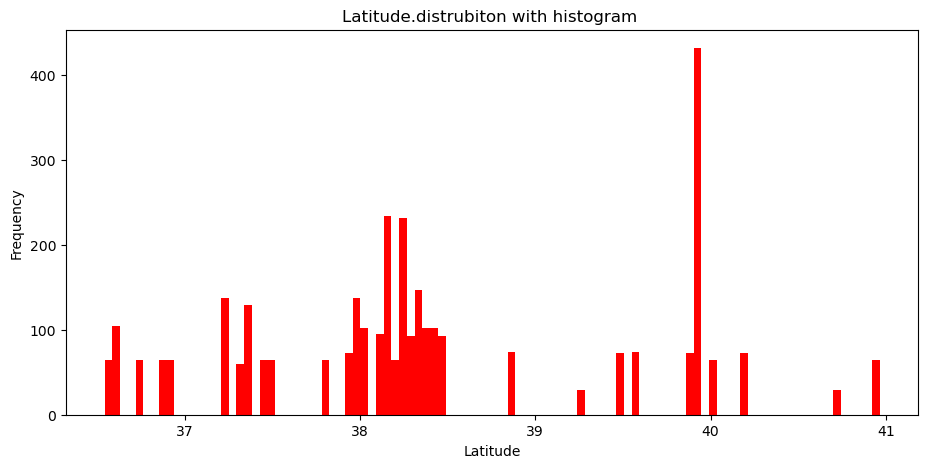

In [93]:
plt_histogram(numeric_columns[0],colors[0])

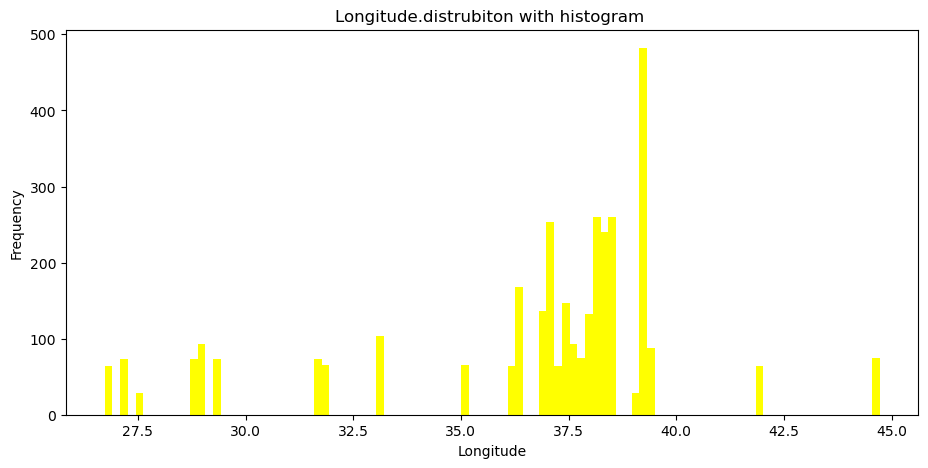

In [94]:
plt_histogram(numeric_columns[1],colors[1])

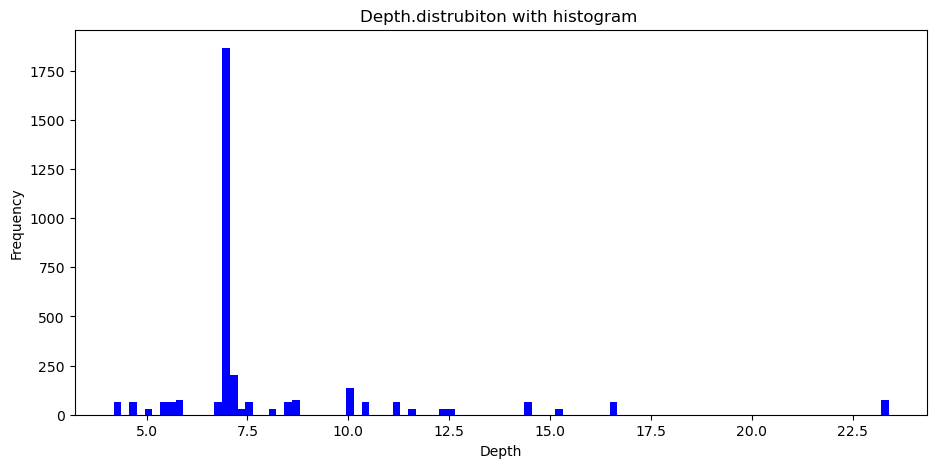

In [95]:
plt_histogram(numeric_columns[2],colors[2])

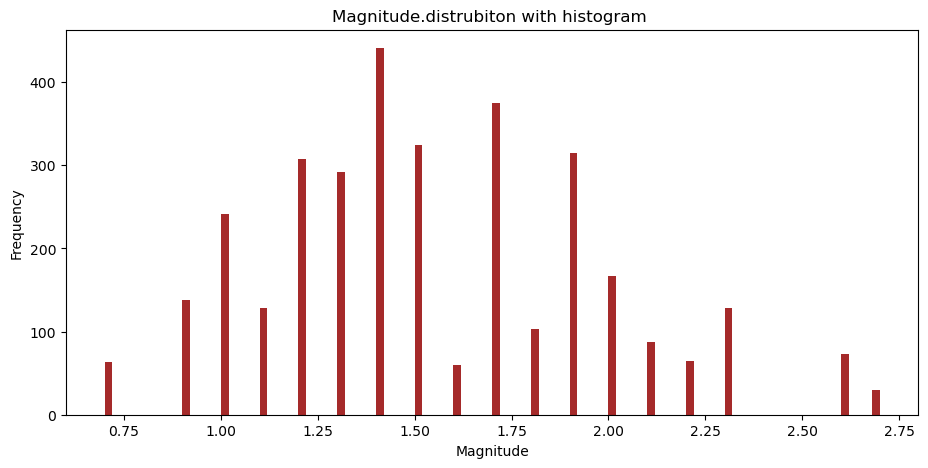

In [96]:
plt_histogram(numeric_columns[3],colors[3])

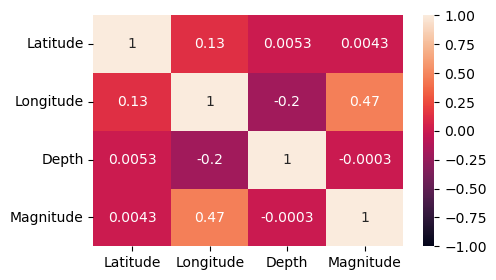

In [97]:
 #corr fonksiyonu sütunlar arasındaki Pearson korelasyon katsayılarını içeren bir matris döndürür.
corr = data[columns].corr()
 #10 birim genişlik 8 birim yüksekliğe sahip bir şekil oluşturuldu.
plt.figure(figsize=(5,3)) 
 #ısı haritası (heatmap) oluşturur. corr matrisi heatmap'e iletilir ve annot=True parametresi, korelasyon katsayılarının heatmap üzerinde görüntülenmesini sağlar. vmin ve vmax parametreleri, renk skalasının minimum ve maksimum değerlerini belirtir.
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0)
plt.show()

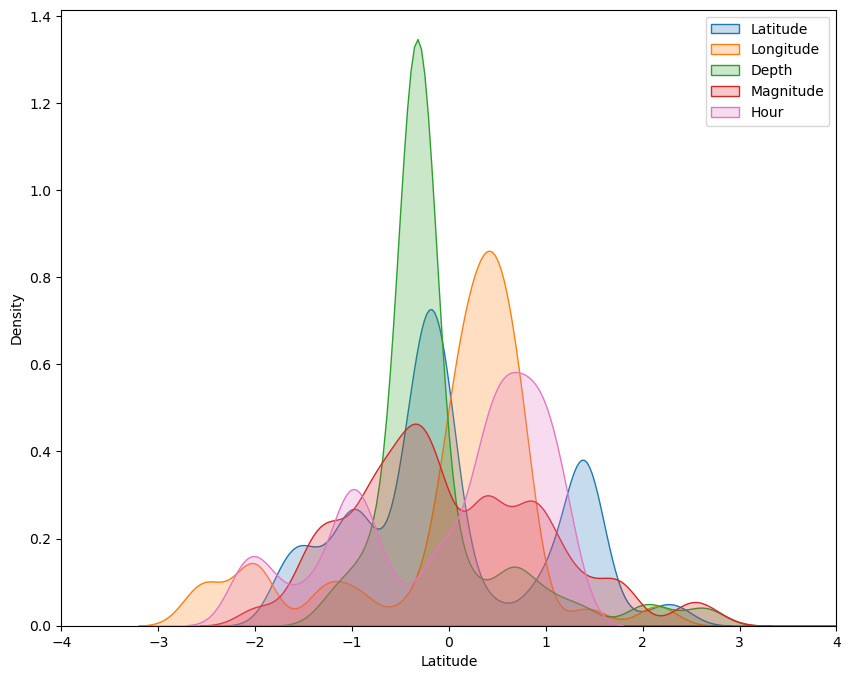

In [98]:
scaler = StandardScaler() #veriyi ölçeklendirmek için nesne oluşturulur.
#fit_transform metoduyla verinin her bir özelliği (sutunu) standartlaştırılır. Ortalama sıfır ve standart sapma bir olan bir standart normal dağılıma dönüştürür
standardized_df = pd.DataFrame(scaler.fit_transform(data[numeric_columns].copy()), columns=numeric_columns)
plt.figure(figsize=(10,8))
for column in numeric_columns:
    sns.kdeplot(standardized_df[column], fill=True ,label=column, warn_singular=False)
plt.xlim(-4,4)
plt.legend()  # Etkiketleri göstermek için
plt.show()

In [99]:
#derinlik seviyelerine göre deprem büyüklüklerinin ortalamalarını incelenmektedir.

df = data[["Depth","Magnitude"]].groupby(["Depth"], as_index = False).mean().sort_values(by= "Magnitude", ascending=False)
df

,Depth,Magnitude
33,12.39,2.700000
17,7.03,2.355769
20,7.11,2.300000
35,14.52,2.200000
2,5.00,2.100000
36,15.29,2.000000
26,8.59,2.000000
12,6.97,1.900000
15,7.01,1.900000
37,16.58,1.900000


In [100]:
"""
magnitude eşik değeri 2 olarak belirlenmiştir. 
data[mwfilter] ile sadece 2'den büyük değerler filtrelenerek seçilir ve 
ona karşılık gelen Latitude ve Longitude sutunlarındaki değerler seçilir.

"""
mwfilter = data["Magnitude"] > 2
data[mwfilter][["Latitude", "Longitude", "Magnitude"]].groupby(["Magnitude"], as_index=False).mean().sort_values(by = "Magnitude", ascending=False)

,Magnitude,Latitude,Longitude
4,2.7,39.926900,39.301900
3,2.6,38.319400,44.722800
2,2.3,38.273900,38.250400
1,2.2,39.936700,39.311400
0,2.1,37.867013,38.004537


In [101]:
mw_two = data[data["Magnitude"] > 2].count().iloc[0]
mw_two

384

Box plot:
Box plot kullanımı, veri setindeki dağılımın genel şeklini, merkezi eğilimi ve yayılımını anlamak için kullanılır. Box plotlar, özellikle gruplar arasındaki karşılaştırmalar yaparken,
veri setlerindeki aykırı değerleri belirlemede ve genelde dağılım hakkında hızlı bir genel görünüm elde etmede kullanışlıdır.

<function matplotlib.pyplot.show(close=None, block=None)>

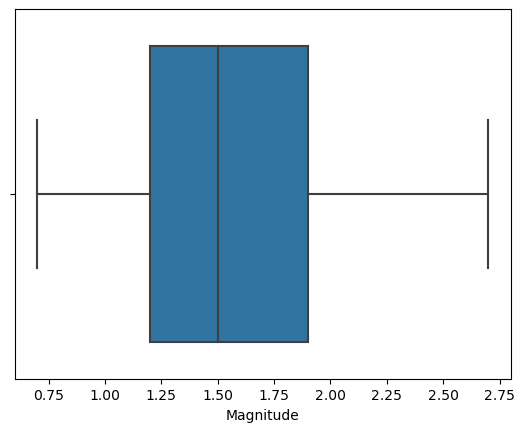

In [102]:
"""
Deprem büyüklüklerinin medyanı, çeyrekler arası aralıkları,
minimum ve maksimum değerleri, ve potansiyel aykırı değerleri görselleştirildi.
"""
sns.boxplot(x=data["Magnitude"])
plt.show

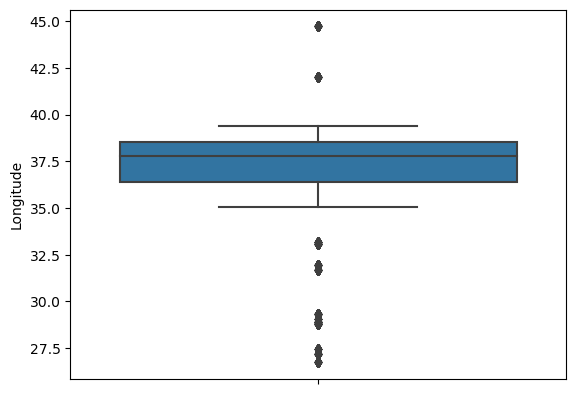

In [103]:
#Longitude sütunundaki verilerin dağılımı ve olası aykırı değerleri görselleştirildi.
sns.boxplot(y=data["Longitude"])
plt.show()

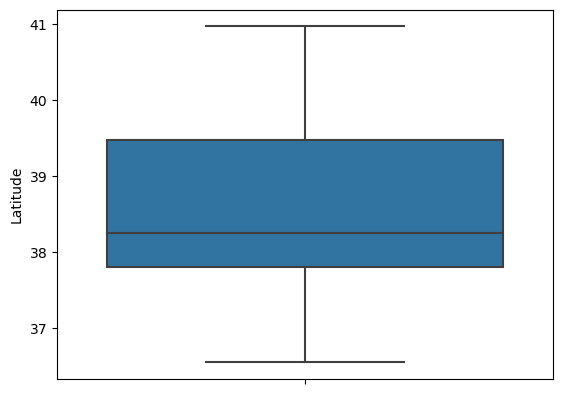

In [104]:
sns.boxplot(y=data["Latitude"])
plt.show()

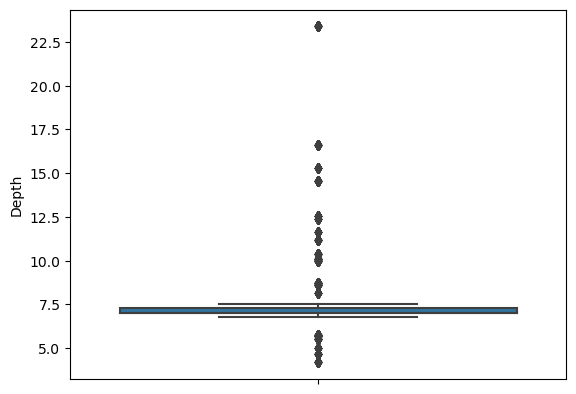

In [105]:
sns.boxplot(y=data["Depth"])
plt.show()

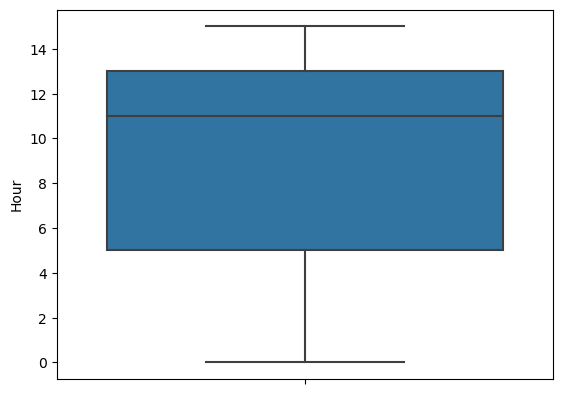

In [106]:
sns.boxplot(y=data["Hour"])
plt.show()

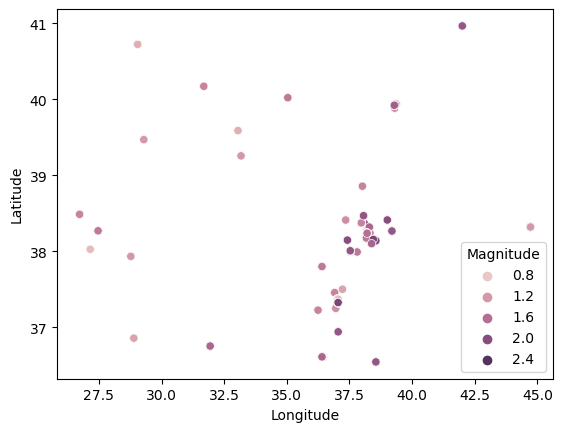

In [107]:
 """
 Dağılım grafiği görselleştirmesi
 Longitude" ve "Latitude" değerlerini kullanarak depremlerin büyüklüğünü ("Magnitude") renk aracılığıyla görselleştirmektir.
 Bu şekilde, coğrafi bölgelerdeki deprem büyüklüklerinin dağılımı hakkında bir anlayış elde edilebilir.
 """

sns.scatterplot(x="Longitude", y="Latitude", hue="Magnitude", data=data)
plt.show()

In [108]:
def outlier_detection(df,features):
    outlier_value_index = []

    for c in features:
       print("*"*20)
       print(c)
       print("*"*20)

       #first quartile
       Q1 = np.percentile(df[c],25)
       print("Q1 : ", Q1)

       #third quartile
       Q3 = np.percentile(df[c], 75)
       print("Q3 : ", Q3)

       #IQR
       IQR = Q3 - Q1
       print("IQR:" , IQR)

       #outlier step
       outlier_step = IQR * 1.5

       #detect outlier and their indeces
       outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index

       #store indeces
       outlier_value_index.extend(outlier_list_col)

       print("Lower Limit: Q1 - 1.5 * IQR : ", Q1 - 1.5 * IQR)
       print("Upper Limit: Q3 + 1.5 * IQR : ", Q3 + 1.5 * IQR)
       print("\n")

    outlier_value_index = Counter(outlier_value_index)
    multiple_outlier_values = list(i for i, v in outlier_value_index.items() if v > 2 )

    return multiple_outlier_values

In [109]:
outlier_values= data.loc[outlier_detection(data,["Magnitude","Depth","Latitude","Longitude"])]
print(outlier_values)

********************
Magnitude
********************
Q1 :  1.2
Q3 :  1.9
IQR: 0.7
Lower Limit: Q1 - 1.5 * IQR :  0.15000000000000013
Upper Limit: Q3 + 1.5 * IQR :  2.9499999999999997


********************
Depth
********************
Q1 :  6.98
Q3 :  7.29
IQR: 0.3099999999999996
Lower Limit: Q1 - 1.5 * IQR :  6.515000000000001
Upper Limit: Q3 + 1.5 * IQR :  7.754999999999999


********************
Latitude
********************
Q1 :  37.7992
Q3 :  39.4689
IQR: 1.6696999999999989
Lower Limit: Q1 - 1.5 * IQR :  35.294650000000004
Upper Limit: Q3 + 1.5 * IQR :  41.97345


********************
Longitude
********************
Q1 :  36.4014
Q3 :  38.5386
IQR: 2.1372
Lower Limit: Q1 - 1.5 * IQR :  33.1956
Upper Limit: Q3 + 1.5 * IQR :  41.7444


Empty DataFrame
Columns: [Latitude, Longitude, Depth, Magnitude, Location, Type_ML, Day, Month, Year, Hour]
Index: []


Çıktı Değerlendirme: Yukarıdaki çıktıya göre Veri setinde bu sınırlar içinde aykırı bir hiçbir değer bulunmuyor.

In [110]:
print(data.isnull().sum())
#veri setinde hiçbir şekilde eksik veri yoktur.

Latitude     0
Longitude    0
Depth        0
Magnitude    0
Location     0
Type_ML      0
Day          0
Month        0
Year         0
Hour         0
dtype: int64


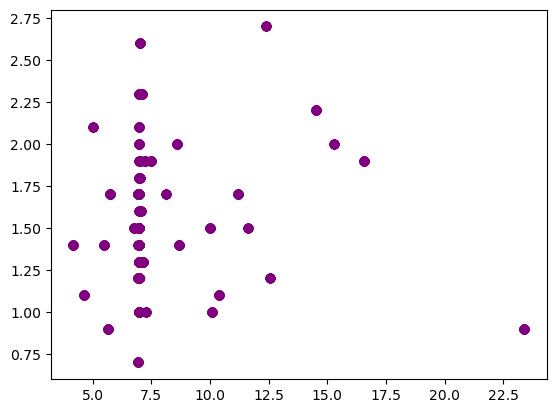

In [111]:
plt.scatter(data["Depth"], data["Magnitude"], color="purple")
plt.xlabel = "Depth"
plt.ylabel = "Magnitude"
plt.show()

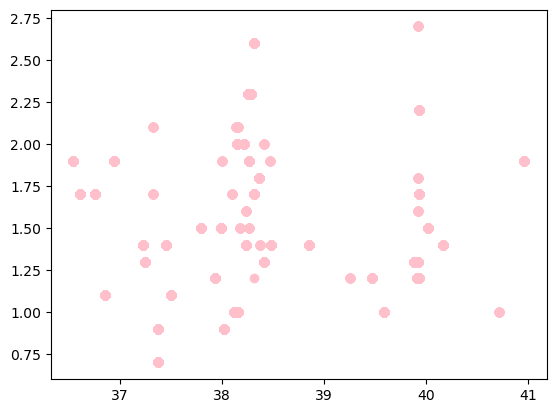

In [112]:
plt.scatter(data["Latitude"], data["Magnitude"], color="pink")
plt.xlabel = "Latitude"
plt.ylabel = "Magnitude"
plt.show()

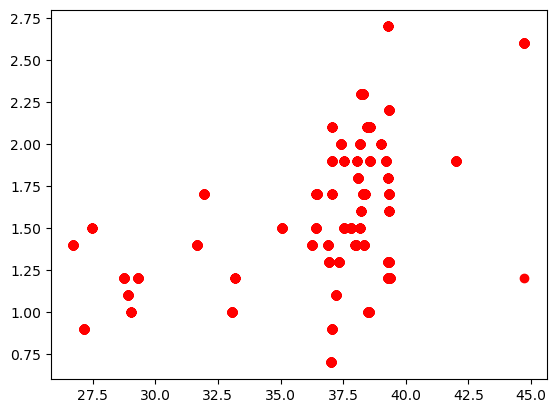

In [113]:
plt.scatter(data["Longitude"], data["Magnitude"], color="red")
plt.xlabel = "Longitude"
plt.ylabel = "Magnitude"
plt.show()

In [114]:
def greater_than_two(Magnitude):
    return(Magnitude>=2)
data["greater than two"]=data["Magnitude"].apply(greater_than_two)
print(data["greater than two"])

0       False
1       False
2        True
3       False
4       False
        ...  
3335    False
3336     True
3337     True
3338    False
3339    False
Name: greater than two, Length: 3340, dtype: bool


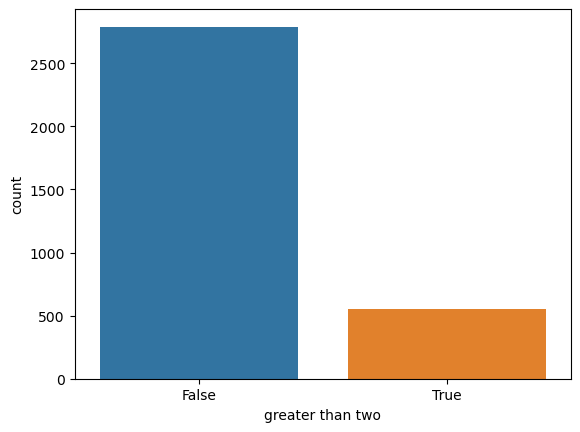

In [115]:
sns.countplot(x="greater than two", data=data)
plt.show()

In [116]:
data.loc[data["Depth"]>=15,'Class'] = "Deep"
data.loc[(data["Depth"] >=10) & (data["Depth"]<15) , 'Class'] = "Middle"
data.loc[data["Depth"]<10 , 'Class'] = "Shallow"
print(data)

      Latitude  Longitude  Depth  Magnitude                  Location  \
0      36.7533    31.9392  11.18        1.7          Alanya (Antalya)   
1      40.0211    35.0383   7.00        1.5             Alaca (Çorum)   
2      39.9367    39.3114  14.52        2.2        Kelkit (Gümüşhane)   
3      38.2667    39.1936   7.22        1.9       Çüngüş (Diyarbakır)   
4      38.1194    38.4828   7.00        1.0         Sincik (Adıyaman)   
...        ...        ...    ...        ...                       ...   
3335   37.3239    37.0428   8.14        1.7  Pazarcık (Kahramanmaraş)   
3336   37.3258    37.0450   5.00        2.1  Pazarcık (Kahramanmaraş)   
3337   39.9269    39.3019  12.39        2.7        Kelkit (Gümüşhane)   
3338   39.9258    39.3258   7.05        1.6        Kelkit (Gümüşhane)   
3339   39.9208    39.2883   7.03        1.8        Kelkit (Gümüşhane)   

      Type_ML Day  Month  Year  Hour  greater than two    Class  
0        True  19     12  2023    15             False   

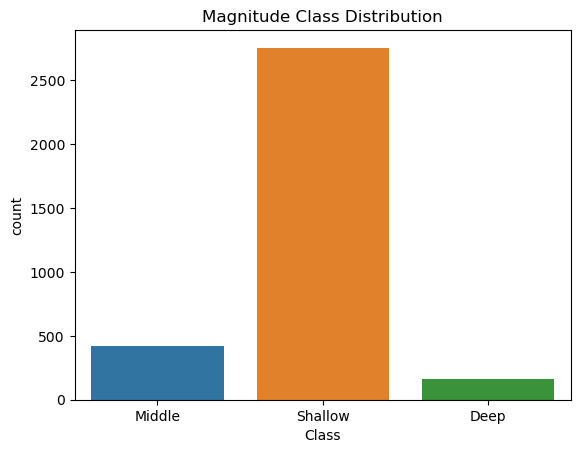

In [117]:
sns.countplot(x="Class", data=data)
plt.title("Magnitude Class Distribution")
plt.show()

In [118]:
data.loc[data["Magnitude"] < 2, "destructiveness"] = "no significant damage occours"
data.loc[data["Magnitude"] >= 2, "destructiveness"] = "high probability of damage"
print(data)

      Latitude  Longitude  Depth  Magnitude                  Location  \
0      36.7533    31.9392  11.18        1.7          Alanya (Antalya)   
1      40.0211    35.0383   7.00        1.5             Alaca (Çorum)   
2      39.9367    39.3114  14.52        2.2        Kelkit (Gümüşhane)   
3      38.2667    39.1936   7.22        1.9       Çüngüş (Diyarbakır)   
4      38.1194    38.4828   7.00        1.0         Sincik (Adıyaman)   
...        ...        ...    ...        ...                       ...   
3335   37.3239    37.0428   8.14        1.7  Pazarcık (Kahramanmaraş)   
3336   37.3258    37.0450   5.00        2.1  Pazarcık (Kahramanmaraş)   
3337   39.9269    39.3019  12.39        2.7        Kelkit (Gümüşhane)   
3338   39.9258    39.3258   7.05        1.6        Kelkit (Gümüşhane)   
3339   39.9208    39.2883   7.03        1.8        Kelkit (Gümüşhane)   

      Type_ML Day  Month  Year  Hour  greater than two    Class  \
0        True  19     12  2023    15             False  

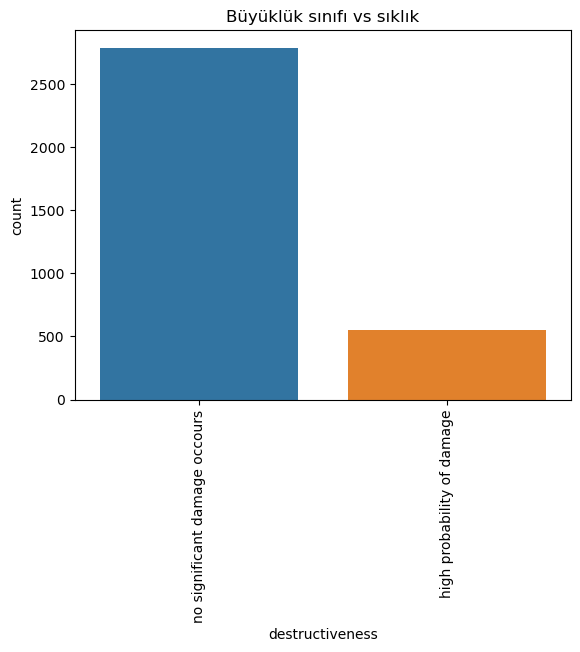

In [119]:
sns.countplot(x = "destructiveness", data=data)
plt.title("Büyüklük sınıfı vs sıklık")
plt.xticks(rotation = 90)
plt.show()

In [120]:
threshold_value= sum(data.Magnitude) / len(data.Magnitude)
data["magnitude level"] = ["hight" if i  > threshold_value else "low" for i in data.Magnitude]
data.loc[:10, ["magnitude level", "Magnitude"]]
print(data)

      Latitude  Longitude  Depth  Magnitude                  Location  \
0      36.7533    31.9392  11.18        1.7          Alanya (Antalya)   
1      40.0211    35.0383   7.00        1.5             Alaca (Çorum)   
2      39.9367    39.3114  14.52        2.2        Kelkit (Gümüşhane)   
3      38.2667    39.1936   7.22        1.9       Çüngüş (Diyarbakır)   
4      38.1194    38.4828   7.00        1.0         Sincik (Adıyaman)   
...        ...        ...    ...        ...                       ...   
3335   37.3239    37.0428   8.14        1.7  Pazarcık (Kahramanmaraş)   
3336   37.3258    37.0450   5.00        2.1  Pazarcık (Kahramanmaraş)   
3337   39.9269    39.3019  12.39        2.7        Kelkit (Gümüşhane)   
3338   39.9258    39.3258   7.05        1.6        Kelkit (Gümüşhane)   
3339   39.9208    39.2883   7.03        1.8        Kelkit (Gümüşhane)   

      Type_ML Day  Month  Year  Hour  greater than two    Class  \
0        True  19     12  2023    15             False  

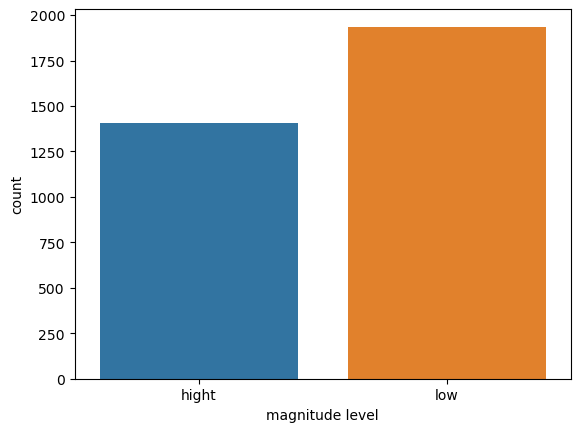

In [121]:
sns.countplot(x = "magnitude level" , data=data)
plt.show()

In [122]:
new_data = pd.DataFrame(data, columns=["Depth", "Magnitude"])
new_data.head()
new_data.Depth = new_data.Depth / max(new_data.Depth)
new_data.Magnitude= new_data.Magnitude / max(new_data.Magnitude)
print(new_data.Magnitude)

0       0.629630
1       0.555556
2       0.814815
3       0.703704
4       0.370370
          ...   
3335    0.629630
3336    0.777778
3337    1.000000
3338    0.592593
3339    0.666667
Name: Magnitude, Length: 3340, dtype: float64


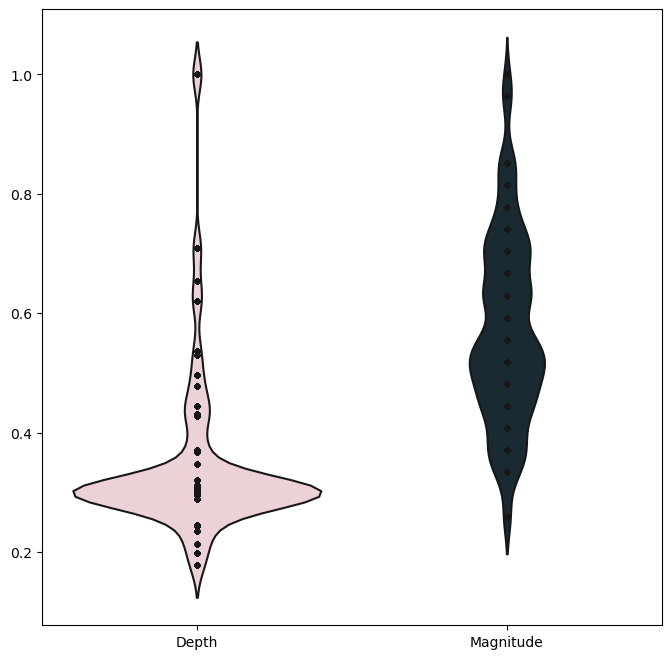

In [123]:
plt.figure(figsize=(8,8))
pal = sns.cubehelix_palette(2, start=6 , rot=-.85)
sns.violinplot(data= new_data, palette= pal, inner= "points")
plt.show()

In [124]:
label_encoder = preprocessing.LabelEncoder()
data["intensity_encoded"] = label_encoder.fit_transform(data["greater than two"])
data["Year_Encoded"] = label_encoder.fit_transform(data["Year"])
data["Latitude_Encoded"] = label_encoder.fit_transform(data["Latitude"])
data["Longitude_Encoded"] = label_encoder.fit_transform(data["Longitude"])
data["Depth_Encoded"] = label_encoder.fit_transform(data["Depth"])
data["Magnitude_Encoded"] = label_encoder.fit_transform(data["Magnitude"])

In [125]:
selected_columns = ['destructiveness', 'Year_Encoded', 'Depth_Encoded', 'Magnitude_Encoded']
data = data[selected_columns]
print(data)


                    destructiveness  Year_Encoded  Depth_Encoded  \
0     no significant damage occours             0             31   
1     no significant damage occours             0             14   
2        high probability of damage             0             35   
3     no significant damage occours             0             22   
4     no significant damage occours             0             14   
...                             ...           ...            ...   
3335  no significant damage occours             0             25   
3336     high probability of damage             0              2   
3337     high probability of damage             0             33   
3338  no significant damage occours             0             19   
3339  no significant damage occours             0             17   

      Magnitude_Encoded  
0                     9  
1                     7  
2                    14  
3                    11  
4                     2  
...                 ...  
3

# MODELLING

In [126]:
array = data.values
X= array[:,1:4]
y = array[:,0:1]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30 , random_state=1)
print("DataFrame boyutu: ", data.shape)
print("Eğitim verisi boyutu: ",X_train.shape, y_train.shape)
print("Test verisi boyutu: ",X_test.shape, y_test.shape)

DataFrame boyutu:  (3340, 4)
Eğitim verisi boyutu:  (2338, 3) (2338, 1)
Test verisi boyutu:  (1002, 3) (1002, 1)


# Decision Trees

In [133]:
cell_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
cell_tree.fit(X_train,y_train)
predictions = cell_tree.predict(X_test)
accuracy = metrics.accuracy_score(y_test,predictions)
print("for decision tree accuracy: ", accuracy)

for decision tree accuracy:  1.0


In [136]:
cell_tree_data = DecisionTreeClassifier(criterion="entropy", max_depth=4)
cv_scores_data = cross_val_score(cell_tree_data,X,y,cv=10)
print(cv_scores_data)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [137]:
print("cv _scores mean: {}".format(np.mean(cv_scores_data)))

cv _scores mean: 1.0


In [138]:
predic_data= classification_report(predictions,y_test)
print(predic_data)

                               precision    recall  f1-score   support

   high probability of damage       1.00      1.00      1.00       158
no significant damage occours       1.00      1.00      1.00       844

                     accuracy                           1.00      1002
                    macro avg       1.00      1.00      1.00      1002
                 weighted avg       1.00      1.00      1.00      1002



# K Neighbors Classifier

In [139]:
y = array[:, 0]  # İlk sütunu seçerek bir sütun vektörü elde ediyoruz
y = array[:, 0].ravel()  # ravel() fonksiyonu ile düzleştirilmiş bir sütun vektörü elde ediyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.30, random_state=1)
Knn_model = KNeighborsClassifier(n_neighbors=3)

In [144]:
neighbors = Knn_model.fit(X_train,y_train)
predict_knn= neighbors.predict(X_test)
accuracy_knn= metrics.accuracy_score(y_test,predict_knn)
print("for knn accuracy", accuracy_knn)

for knn accuracy 1.0


In [146]:
# for k=3 confusion matrix and metric values
k = KNeighborsClassifier(n_neighbors=3)
k

KNeighborsClassifier(n_neighbors=3)

In [147]:
cv_scores_knn= cross_val_score(k,X,y,cv=10)
print(cv_scores_knn)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [148]:
print("cv_scores mean: {}".format(np.mean(cv_scores_knn)))

cv_scores mean: 1.0


In [149]:
predict_knn= classification_report(predict_knn, y_test)
print(predict_knn)

                               precision    recall  f1-score   support

   high probability of damage       1.00      1.00      1.00       158
no significant damage occours       1.00      1.00      1.00       844

                     accuracy                           1.00      1002
                    macro avg       1.00      1.00      1.00      1002
                 weighted avg       1.00      1.00      1.00      1002



# Gaussian NB

In [151]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
predict_gnb= gnb.predict(X_test)

In [152]:
accuracy_gnb= metrics.accuracy_score(y_test,predict_gnb)
print("for gaussian naive base accuracy",accuracy_gnb)

for gaussian naive base accuracy 1.0


In [153]:
clf_gnb = GaussianNB()
cv_scores_gnb = cross_val_score(clf_gnb,X,y,cv=10)
print(cv_scores_gnb)

[1.         1.         1.         1.         0.97305389 0.91616766
 0.91916168 0.97005988 1.         1.        ]


In [154]:
print("cv_scores mean: {}".format(np.mean(cv_scores_gnb)))

cv_scores mean: 0.9778443113772454


In [155]:
predict_gnb= classification_report(predict_gnb, y_test)
print(predict_gnb)

                               precision    recall  f1-score   support

   high probability of damage       1.00      1.00      1.00       158
no significant damage occours       1.00      1.00      1.00       844

                     accuracy                           1.00      1002
                    macro avg       1.00      1.00      1.00      1002
                 weighted avg       1.00      1.00      1.00      1002



# Logistic Regression

In [156]:
LR = LogisticRegression(C= 0.01, solver="liblinear").fit(X_train,y_train)
lr_predict= LR.predict(X_test)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [157]:
accuracy_lr = metrics.accuracy_score(y_test,lr_predict)
print("for logistic regression accuracy", accuracy_lr)

for logistic regression accuracy 0.93812375249501


In [158]:
logistic_r = LogisticRegression(C=0.01,solver="liblinear")
cv_scores_logistic_r = cross_val_score(logistic_r,X,y,cv=10)
print(cv_scores_logistic_r)

[0.91616766 0.91916168 0.91616766 0.91916168 0.91616766 0.91616766
 0.91916168 0.92814371 0.93413174 0.93113772]


In [159]:
print("cv_scores mean: {}".format(np.mean(cv_scores_logistic_r)))

cv_scores mean: 0.9215568862275451


In [160]:
predict_lr= classification_report(lr_predict, y_test)
print(predict_lr)


                               precision    recall  f1-score   support

   high probability of damage       0.61      1.00      0.76        96
no significant damage occours       1.00      0.93      0.96       906

                     accuracy                           0.94      1002
                    macro avg       0.80      0.97      0.86      1002
                 weighted avg       0.96      0.94      0.94      1002



# Polynomial Regression

In [163]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_degree = 2 
poly = PolynomialFeatures(degree=poly_degree)
X_poly = poly.fit_transform(X_train)
poly_lr = LogisticRegression(C=0.01, solver="liblinear").fit(X_poly, y_train)
X_test_poly = poly.transform(X_test)
poly_lr_predict = poly_lr.predict(X_test_poly)



In [164]:
accuracy_poly_lr = metrics.accuracy_score(y_test, poly_lr_predict)
print("Polynomial logistic regression accuracy:", accuracy_poly_lr)



Polynomial logistic regression accuracy: 1.0


In [165]:
poly_logistic_r = LogisticRegression(C=0.01, solver="liblinear")
cv_scores_poly_logistic_r = cross_val_score(poly_logistic_r, X_poly, y_train, cv=10)
print(cv_scores_poly_logistic_r)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [166]:
print("CV_scores mean: {}".format(np.mean(cv_scores_poly_logistic_r)))

CV_scores mean: 1.0


In [167]:
predict_poly_lr = classification_report(poly_lr_predict, y_test)
print(predict_poly_lr)

                               precision    recall  f1-score   support

   high probability of damage       1.00      1.00      1.00       158
no significant damage occours       1.00      1.00      1.00       844

                     accuracy                           1.00      1002
                    macro avg       1.00      1.00      1.00      1002
                 weighted avg       1.00      1.00      1.00      1002



# Random Forest

In [168]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.30, random_state=1)

rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train)
rf_predict = rf_model.predict(X_test)

In [169]:
accuracy_rf = metrics.accuracy_score(y_test, rf_predict)
print("Random Forest accuracy:", accuracy_rf)

Random Forest accuracy: 1.0


In [170]:
rf = RandomForestClassifier(n_estimators=100, random_state=1)
cv_scores_rf = cross_val_score(rf, X, y.ravel(), cv=10)
print(cv_scores_rf)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [171]:
print("CV_scores mean: {}".format(np.mean(cv_scores_rf)))

CV_scores mean: 1.0


In [172]:
predict_rf = classification_report(rf_predict, y_test)
print(predict_rf)

                               precision    recall  f1-score   support

   high probability of damage       1.00      1.00      1.00       158
no significant damage occours       1.00      1.00      1.00       844

                     accuracy                           1.00      1002
                    macro avg       1.00      1.00      1.00      1002
                 weighted avg       1.00      1.00      1.00      1002



# Support Vector Machines

In [173]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.30, random_state=1)

svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)
svm_predict = svm_model.predict(X_test)

In [174]:
accuracy_svm = metrics.accuracy_score(y_test, svm_predict)
print("SVM accuracy:", accuracy_svm)

SVM accuracy: 1.0


In [181]:
svm = SVC(kernel='linear', C=1)
cv_scores_svm = cross_val_score(svm, X, y.ravel(), cv=10)
print(cv_scores_svm)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [182]:
print("CV_scores mean: {}".format(np.mean(cv_scores_svm)))

CV_scores mean: 1.0


In [183]:
predict_svm = classification_report(svm_predict, y_test)
print(predict_svm)

                               precision    recall  f1-score   support

   high probability of damage       1.00      1.00      1.00       158
no significant damage occours       1.00      1.00      1.00       844

                     accuracy                           1.00      1002
                    macro avg       1.00      1.00      1.00      1002
                 weighted avg       1.00      1.00      1.00      1002



In [185]:
import joblib

joblib.dump(neighbors, 'knn_model.joblib')

['knn_model.joblib']